In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import time
import sys
sys.path.append("./libs")
from imtools import imres

In [2]:
# Define a function to show the change rate between this and last iterations for multi-image restorations simutaneously
def show_info(i,*argv):
    print("***------ Iteration %d ------***"%(i+1))
    for img in range(len(argv)): 
        print("The change rate of image %d is %.2f%%"%(img+1,argv[img]))

In [3]:
# Import images
# _s and _m represents scratched and mask images respectively
# mask image is only black and white, import it as grayscale
# OpenCV imports image as BGR. I change it to RGB for captability in matplotlib.pyplot.imshow

# img1 is a cat
img1 = cv2.imread('images/img1_clean.jpeg')         # clean image
img1_s = cv2.imread('images/img1_scratch.jpeg')     # scratched image
img1_m = cv2.imread('images/img1_mask.bmp', 0)      # mask image

# img2 is a cat as well
img2 = cv2.imread('images/img2_clean.jpeg')
img2_s = cv2.imread('images/img2_scratch.jpeg')
img2_m = cv2.imread('images/img2_mask.bmp', 0)

# img3 is fruit
img3 = cv2.imread('images/img3_clean.jpeg')
img3_s = cv2.imread('images/img3_scratch.jpeg')
img3_m = cv2.imread('images/img3_mask.bmp', 0)

In [4]:
# Initializing the resotration process
img1res = imres(img1, mask = img1_m, cutoff = 1300, radi = 3)
img2res = imres(img2, mask = img2_m, cutoff = 1300, radi = 3)
img3res = imres(img3, mask = img3_m, cutoff = 700, radi = 3)

In [5]:
# Iterate 10 times and show the info in each iteration
print("The radius of Markov blanket is 3 pixels.")
print("There are %d, %d and %d pixels will be restored in images 1, 2 and 3 respectively.\n"%(img1res.pixnum,img2res.pixnum,img3res.pixnum))

start = time.time()
for i in range(10):
    img1res.restore()
    img2res.restore()
    img3res.restore()
    show_info(i, img1res.change, img2res.change, img3res.change)
    iters = i+1
cost = time.time() - start

print("***---------- Done ----------***\n")
print("Three images with %d iterations each totally costs %d mins %d secs."%(iters,cost//60,cost%60))

The radius of Markov blanket is 3 pixels.
There are 27995, 25360 and 41798 pixels will be restored in images 1, 2 and 3 respectively.

***------ Iteration 1 ------***
The change rate of image 1 is 99.61%
The change rate of image 2 is 99.61%
The change rate of image 3 is 99.62%
***------ Iteration 2 ------***
The change rate of image 1 is 89.58%
The change rate of image 2 is 89.54%
The change rate of image 3 is 85.39%
***------ Iteration 3 ------***
The change rate of image 1 is 67.44%
The change rate of image 2 is 68.46%
The change rate of image 3 is 58.94%
***------ Iteration 4 ------***
The change rate of image 1 is 47.45%
The change rate of image 2 is 49.34%
The change rate of image 3 is 39.59%
***------ Iteration 5 ------***
The change rate of image 1 is 32.11%
The change rate of image 2 is 34.31%
The change rate of image 3 is 27.48%
***------ Iteration 6 ------***
The change rate of image 1 is 21.51%
The change rate of image 2 is 24.06%
The change rate of image 3 is 19.20%
***----

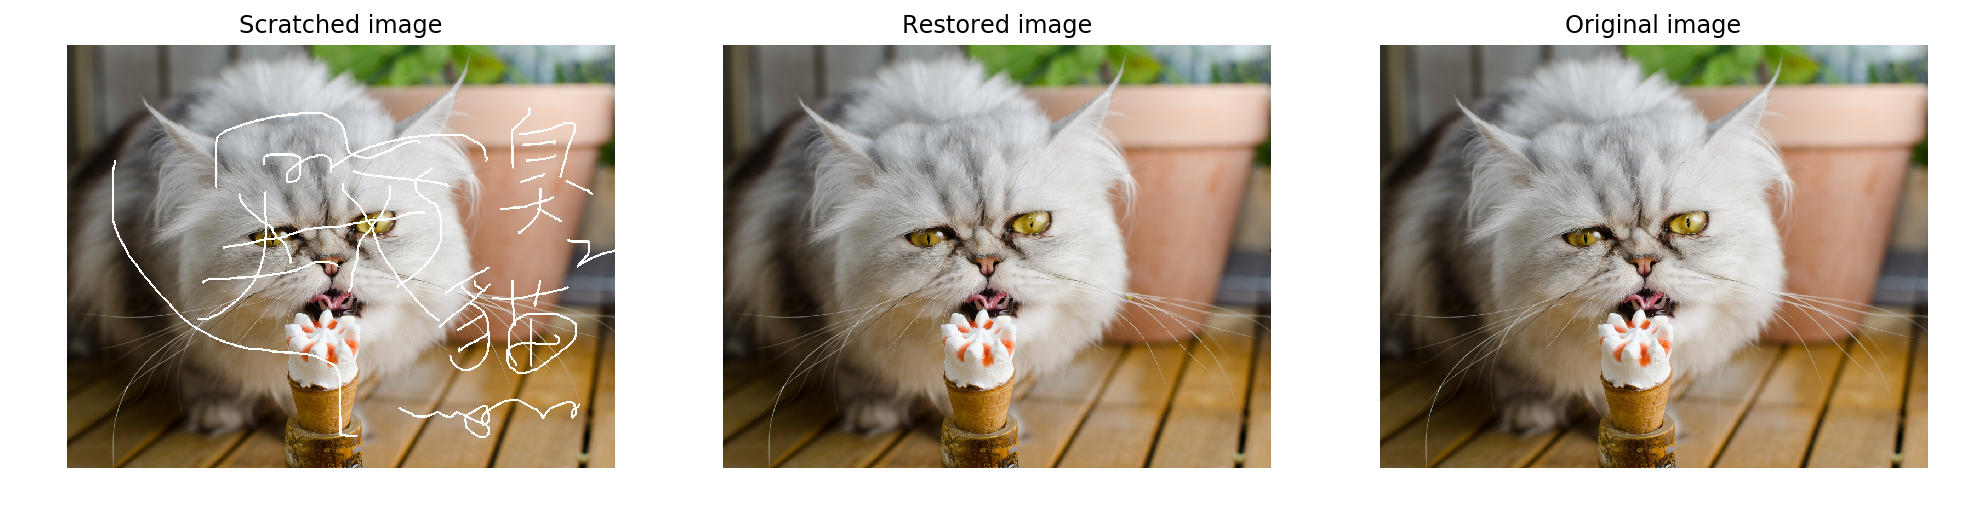

In [6]:
# Compare the three images: scratched, restored and original
# The slice option [:,:,::-1] swaps the BGR in cv2 into RGB which accepts by plt.imshow
plt.figure(figsize=(25/1.5,9/1.5))
plt.subplot(1,3,1)
plt.imshow(img1_s[:,:,::-1])
plt.title("Scratched image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img1res.status()[:,:,::-1])
plt.title("Restored image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img1[:,:,::-1])
plt.title("Original image")
plt.axis("off")

#plt.savefig("img1_restored.png",dpi=300,bbox_inches = 'tight')

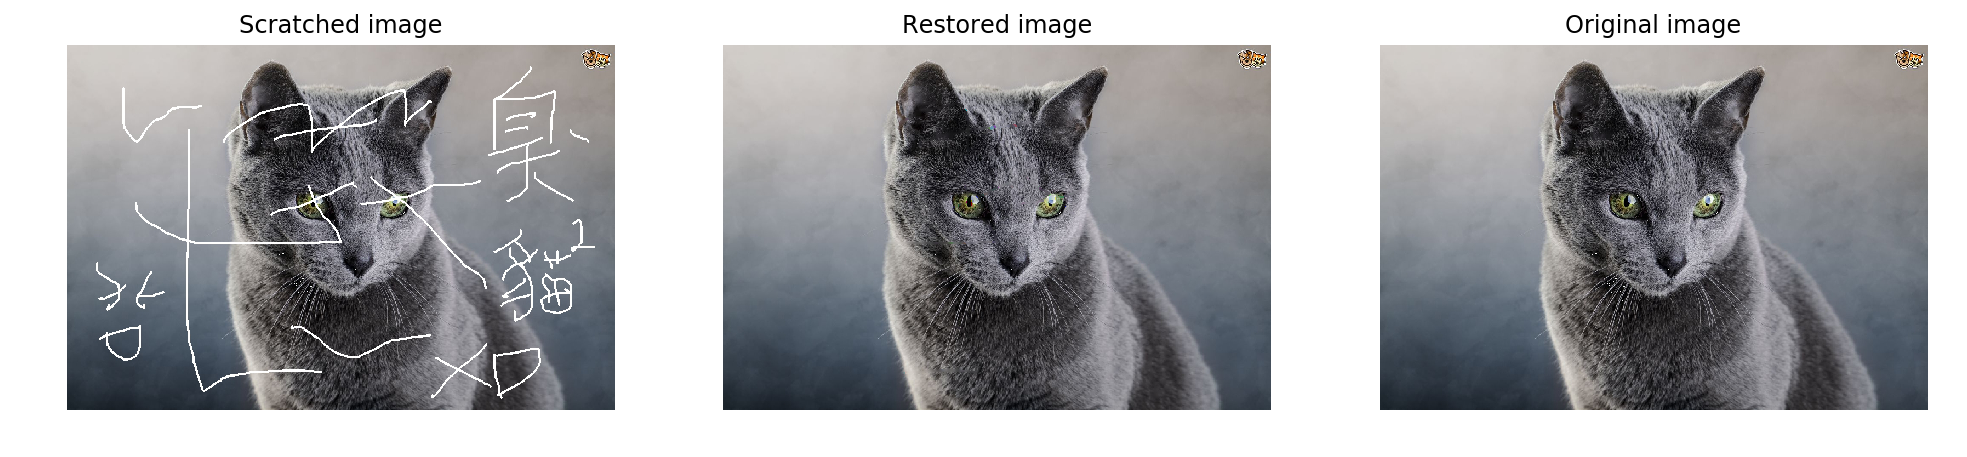

In [7]:
plt.figure(figsize=(25/1.5,9/1.7))
plt.subplot(1,3,1)
plt.imshow(img2_s[:,:,::-1])
plt.title("Scratched image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img2res.status()[:,:,::-1])
plt.title("Restored image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img2[:,:,::-1])
plt.title("Original image")
plt.axis("off")

#plt.savefig("img2_restored.png",dpi=300,bbox_inches = 'tight')

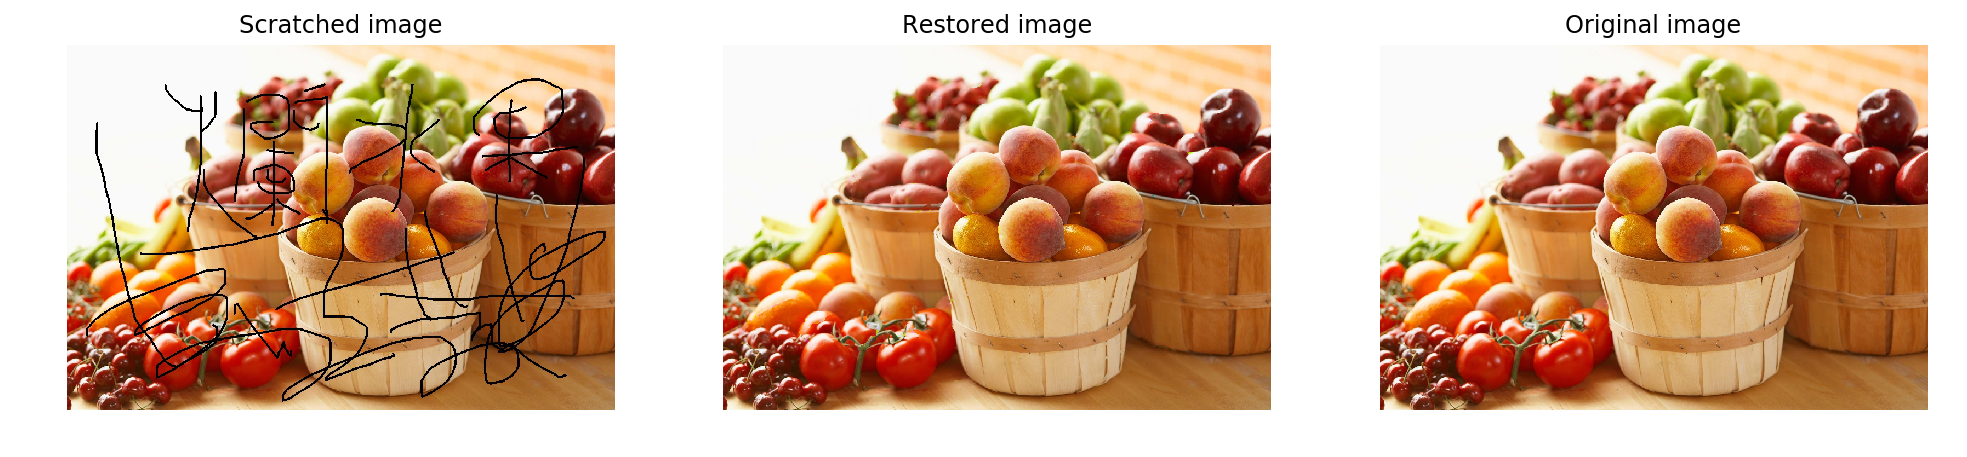

In [8]:
plt.figure(figsize=(25/1.5,9/2))
plt.subplot(1,3,1)
plt.imshow(img3_s[:,:,::-1])
plt.title("Scratched image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(img3res.status()[:,:,::-1])
plt.title("Restored image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img3[:,:,::-1])
plt.title("Original image")
plt.axis("off")

#plt.savefig("img3_restored.png",dpi=300,bbox_inches = 'tight')